Описание стенда
===============
- CPU: AMD Ryzen 9 7900X, 12 физических, 24 логических ядра, max 5.733 GHz
- RAM: 128 Gb, 3600 MHz, DDR5
- OS: Ubuntu 22.04 

Подготовка
==========
- Swapfile отключен
- Частота процессора выставлена на максимальную
- Отключены сильно нагружающие систему фоновые приложения
- Перед замерами код выполняется на копиях исходных дизъюнктов 5 раз для "прогрева"
- Процесс прибивается к одному ядру

Детали замеров
==============
- CNF: `./data/jnf301.cnf`, $100$ переменных, $900$ дизъюнктов
- Замеряется только выполнение `dpll()`, работа с файловой системой и выводом - нет
- Для замеров используется вызов `clock_gettime(CLOCK_MONOTONIC)` из `<time.h>`
- Выборка размером $40$

In [44]:
t=[3260.139362, 3260.685278, 3261.045313, 3260.036415, 3259.739562, 3259.19095, 3258.126558, 3259.582443, 3259.33853, 3258.507842, 3257.3064, 3259.097532, 3258.312591, 3259.150794, 3258.023562, 3258.108303, 3258.926666, 3258.068226, 3259.184244, 3261.066501, 3259.889735, 3259.375629, 3260.51322, 3260.830322, 3259.988613, 3260.978002, 3261.481319, 3260.682841, 3261.190307, 3261.049959, 3260.380106, 3261.249187, 3259.543627, 3261.37727, 3260.742894, 3260.925391, 3261.758173, 3260.441263, 3262.318176, 3260.677461]

In [45]:
len(t)

40

In [46]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import math

(array([1., 4., 2., 5., 5., 4., 7., 8., 3., 1.]),
 array([3257.3064   , 3257.8075776, 3258.3087552, 3258.8099328,
        3259.3111104, 3259.812288 , 3260.3134656, 3260.8146432,
        3261.3158208, 3261.8169984, 3262.318176 ]),
 <BarContainer object of 10 artists>)

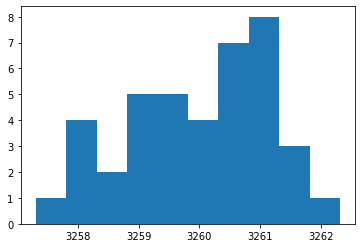

In [47]:
plt.hist(t)

In [48]:
stats.normaltest(t)

NormaltestResult(statistic=1.9430167660664515, pvalue=0.37851166671232894)

In [49]:
stats.shapiro(t)

ShapiroResult(statistic=0.9682070016860962, pvalue=0.3153107464313507)

Оба $pvalue > 0.05$, данные проходят тесты на нормальность

Среднее

In [50]:
np.mean(t)

3259.975764175

Стандартное отклонение

In [51]:
np.std(t, ddof=1)

1.2011582132708423

Стандартное отклонение среднего

In [52]:
np.std(t, ddof=1)/math.sqrt(len(t))

0.1899197892077075

Доверительный интервал

In [53]:
stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)

0.38414903158900526

Результаты (в мкс)
- Погрешность - $1 ms$
- Среднее - $3260 ms$